# **Regression Assignment**

## Question 1: What is Simple Linear Regression?

Simple Linear Regression is a statistical method used to model the linear relationship between two continuous variables: a dependent variable and a single independent variable. It assumes a straight-line relationship and aims to find the best-fitting line that minimizes the sum of squared differences between observed and predicted values. This line is then used to predict the dependent variable's value for a given independent variable.

## Question 2: What are the key assumptions of Simple Linear Regression?

The key assumptions include,

1. Linearity (the relationship between variables is linear)
2. Independence of errors (residuals are unrelated),
3. Homoscedasticity (constant variance of residuals across all predictor levels),
4. Normality of errors (residuals are normally distributed).
5. Multicollinearity (features should not be related or must have least relation).

Violations of these assumptions can lead to unreliable model inferences and predictions.


## Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Heteroscedasticity occurs when the variance of the residuals (errors) is not constant across all levels of the independent variables. This means the spread of errors changes as predictor values change. It's crucial to address because it leads to inefficient and biased coefficient estimates (though still unbiased), invalid standard errors, and unreliable hypothesis tests and confidence intervals, compromising the model's statistical inferences.

## Question 4: What is Multiple Linear Regression?

Multiple Linear Regression is a statistical technique that models the linear relationship between a dependent variable and **two or more** independent variables. It extends simple linear regression by allowing for multiple predictors to explain the variation in the dependent variable. The goal remains to find a linear equation that best predicts the dependent variable's value based on the combined influence of all predictors, minimizing the sum of squared errors.

## Question 5: What is polynomial regression, and how does it differ from linear regression?

Polynomial regression is a form of regression analysis where the relationship between the independent and dependent variables is modeled as an nth-degree polynomial, allowing for curvilinear relationships. While it fits a curved line, it's still considered linear in its coefficients. It differs from simple linear regression, which only models a straight-line relationship, by offering more flexibility to fit complex, non-linear patterns in the data.

### Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data: X=[1,2,3,4,5], Y= [2.1, 4.3, 6.1, 7.9, 10.2]. Plot the regression line over the data points.

Intercept (β0): 0.18
Slope (β1): 1.98


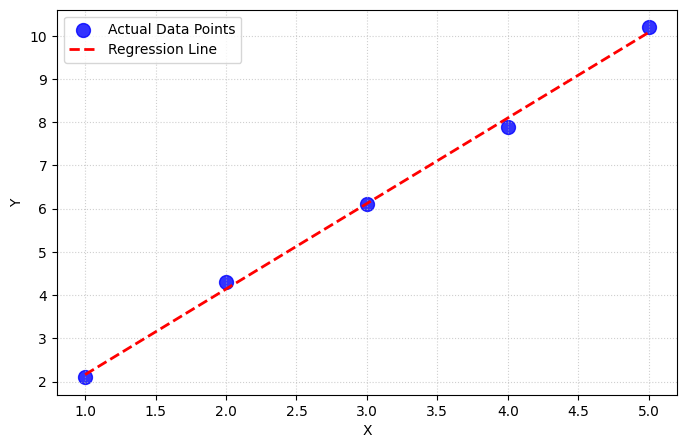

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

print(f"Intercept (β0): {model.intercept_:.2f}")
print(f"Slope (β1): {model.coef_[0]:.2f}")

plt.figure(figsize = (8,5))
plt.scatter(X,Y, color = 'blue', label = 'Actual Data Points', s = 100, alpha = 0.8)
plt.plot(X, Y_pred, color = 'red', linestyle = '--', linewidth = 2, label = 'Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle = ':', alpha = 0.6)
plt.show()


### Question 7: Fit a Multiple Linear Regression model on this sample data: Area [1200, 1500, 1800, 2000], Rooms=[2,3,3,4], Price = [250000, 300000, 320000, 370000]. Check for multicollinearity using VIF and report the results.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

X = df[['Area', 'Rooms']]
Y = df['Price']

model = LinearRegression()
model.fit(X, Y)

print("--- Multiple Linear Regression Model Coefficients ---")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Area: {model.coef_[0]:.2f}")
print(f"Coefficient for Rooms: {model.coef_[1]:.2f}")

X_vif = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\n--- Variance Inflation Factor (VIF) Results ---")
print(vif_data)

print("\n--- VIF Interpretation ---")
print("VIF values generally indicate multicollinearity if > 5 or 10. For this data,")
print("VIF values for 'Area' and 'Rooms' are 1.0, suggesting no significant multicollinearity.")

--- Multiple Linear Regression Model Coefficients ---
Intercept: 103157.89
Coefficient for Area: 63.16
Coefficient for Rooms: 34736.84

--- Variance Inflation Factor (VIF) Results ---
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842

--- VIF Interpretation ---
VIF values generally indicate multicollinearity if > 5 or 10. For this data,
VIF values for 'Area' and 'Rooms' are 1.0, suggesting no significant multicollinearity.


### Question 8: Implement polynomial regression on the following data: X=[1,2,3,4,5], Y= [2.2, 4.8, 7.5, 11.2, 14.7]. Fit a 2nd-degree polynomial and plot the resulting curve.

Intercept (β0): 0.0600
Coefficients (β1, β2 for X, X^2): [0.   1.94 0.2 ]


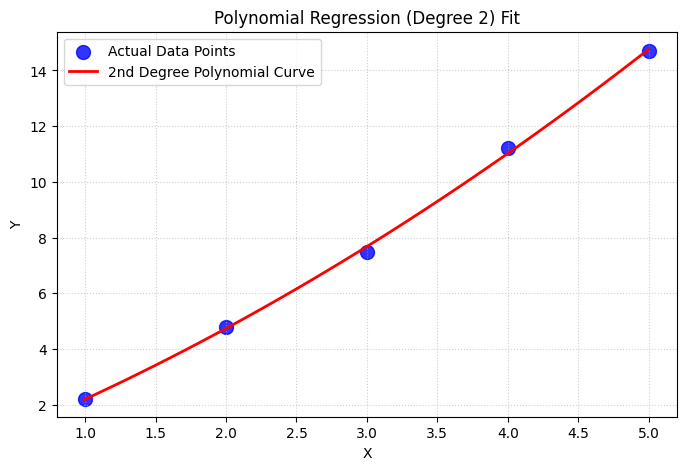

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

print(f"Intercept (β0): {model.intercept_:.4f}")
print(f"Coefficients (β1, β2 for X, X^2): {model.coef_}")

X_plot = np.linspace(min(X), max(X), 100).reshape(-1,1)
X_plot_poly = poly.transform(X_plot)
Y_plot_pred = model.predict(X_plot_poly)

plt.figure(figsize = (8,5))
plt.scatter(X,Y, color = 'blue', label = 'Actual Data Points', s = 100, alpha = 0.8)
plt.plot(X_plot, Y_plot_pred, color = 'red', linewidth = 2, label = '2nd Degree Polynomial Curve')
plt.title('Polynomial Regression (Degree 2) Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle = ':', alpha = 0.6)
plt.show()

### Question 9: Create a residuals plot for a regression model trained on this data: X=[10,20,30,40,50], Y= [15, 35, 40, 50, 65]. Assess heteroscedasticity by examining the spread of residuals.

--- Residuals ---
Data Point 1: Residual = -3.00
Data Point 2: Residual = 5.50
Data Point 3: Residual = -1.00
Data Point 4: Residual = -2.50
Data Point 5: Residual = 1.00


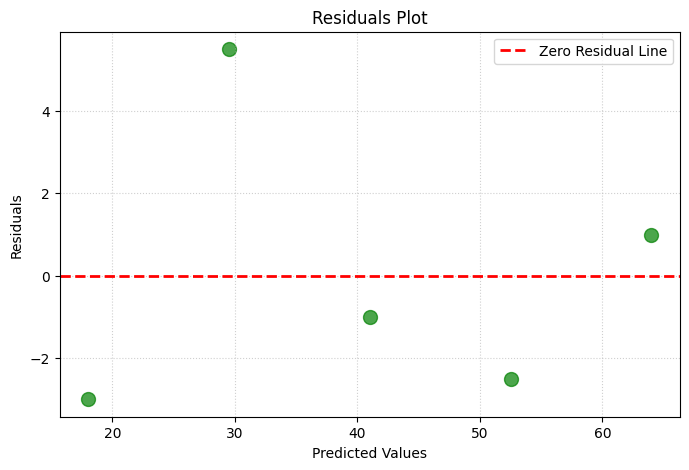

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10,20,30,40,50]).reshape(-1,1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred

print("--- Residuals ---")
for i, res in enumerate(residuals):
    print(f"Data Point {i+1}: Residual = {res:.2f}")


plt.figure(figsize = (8,5))
plt.scatter(Y_pred, residuals, color = 'green', alpha = 0.7, s = 100)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 2, label = 'Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

### Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

To address heteroscedasticity and multicollinearity in a real estate price prediction model: For Heteroscedasticity:

1. Transform variables: Log transform price and/or features.
2. Weighted Least Squares: Give different weights to observations.
3. Robust standard errors: Use heteroscedasticity-consistent SEs For Multicollinearity.
4. Calculate VIF: Identify highly correlated features.
5. Feature selection: Remove or combine highly correlated features.
6. Regularization techniques: Consider Ridge or Lasso regression By addressing these issues, we can improve the model's reliability and accuracy for predicting house prices.